In [13]:
from scipy.stats import rv_continuous
import numpy as np
import matplotlib.pyplot as plt

class frechet_distribution_gen(rv_continuous):
    "Frechet distribution"
    def _pdf(self, x, shape, scale_param):
        return scale_param * shape * x ** (-1 - shape) * np.exp(- scale_param * x ** -shape)
    
    def _cdf(self, x, shape, scale_param):
        return np.exp(- scale_param * x ** -shape)
    
    def _get_support(self, *args):
        return (0, np.inf)

# Create a frozen instance of our distribution
frechet_distribution = frechet_distribution_gen(name='frechet')

def frechet_draws(shape, scale_param, size=1):
    return frechet_distribution.rvs(shape, scale_param, size=size)

def draw_samples(shape, scale_matrix, size=1):
    # Initialize an array to store the samples
    samples = np.empty(scale_matrix.shape)

    # Draw samples for each scale parameter in the matrix
    for i in range(scale_matrix.shape[0]):
        for j in range(scale_matrix.shape[1]):
            samples[i, j] = frechet_distribution.rvs(shape, scale_matrix[i, j], size=size)

    return samples

def get_city(shape, scales, rho_value):
    scales = np.power(scales, 1 / (1 - rho_value))
    shape = shape ** (1 / (1 - rho_value))
    draws = draw_samples(shape, scales)
    max_col_index = np.unravel_index(np.argmax(draws), draws.shape)[1]
    return max_col_index

In [14]:
import pandas as pd

# Assume two occupations, trades and services 
# Assume 3 cities and 2 household types 

# Houehold types 
trade_focus = [0.7, 0.4] 
service_focus = [0.3, 0.8] 

# City types
detriot_t = [0.7, 0.2] 
chicago_t = [0.8, 0.1] 
new_york_s = [0.3, 0.8] 

# Assume some parameters 
shape = 2
rho_values = [0.7, 0.5]

# Calculate city household type pair scale parameters
households = [trade_focus, service_focus]
cities = [detriot_t, chicago_t, new_york_s]

houehold_names = ['trade', 'service']
city_names = ['detriot', 'chicago', 'new_york']

scale_paramaters = {}

for houehold in households:
    for city in cities:
        scale_matrix = [a*b for a, b in zip(houehold, city)]
        scale_paramaters[(houehold_names[households.index(houehold)], city_names[cities.index(city)])] = scale_matrix

df_scales = pd.DataFrame(scale_paramaters)
df_scales.index = ['trade', 'service']

In [15]:
df_trades = df_scales.filter(like='trade')
df_services = df_scales.filter(like='service')

t_draws = draw_samples(shape, df_trades.values)
s_draws = draw_samples(shape, df_services.values)

max_col_index = np.unravel_index(np.argmax(t_draws), t_draws.shape)[1]

/tmp/ipykernel_61288/1559986481.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  samples[i, j] = frechet_distribution.rvs(shape, scale_matrix[i, j], size=size)


In [16]:
location_choice = {}

for i in range(100):
    max_city = get_city(shape, df_trades.values, rho_values[0])
    location_choice[max_city] = location_choice.get(max_city, 0) + 1

for i in range(100):
    max_city = get_city(shape, df_services.values, rho_values[1])
    location_choice[max_city] = location_choice.get(max_city, 0) + 1

location_choice = {city_names[k]: v for k, v in location_choice.items()}

/tmp/ipykernel_61288/1559986481.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  samples[i, j] = frechet_distribution.rvs(shape, scale_matrix[i, j], size=size)


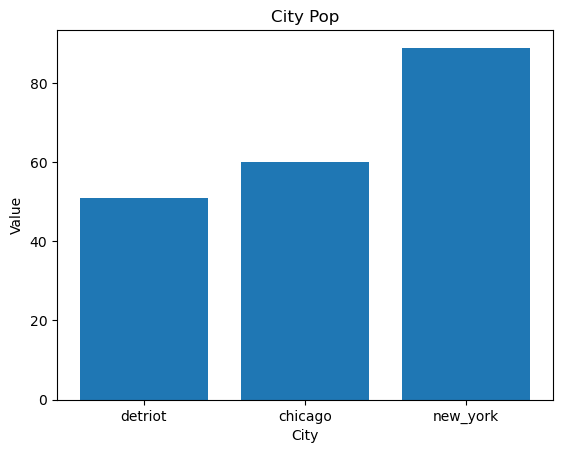

In [17]:
plt.bar(location_choice.keys(), location_choice.values())
plt.xlabel('City')
plt.ylabel('Value')
plt.title('City Pop')
plt.show()